<a href="https://colab.research.google.com/github/divupadhyay/Social-Media-Sentiment-Analysis-using-DM-and-ML/blob/main/Copy_of_Copy_of_Sentiment_Analysis_of_text_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading dataset from Kaggle

In [ ]:
# installing kaggle library
!pip install kaggle

In [ ]:
# Set up Kaggle API key - adjust the path to where your kaggle.json is located on Windows
import os
import shutil

# Example: assuming kaggle.json is in the same directory as your notebook
kaggle_json_path = os.path.join(os.getcwd(), "kaggle.json")
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")

# Create .kaggle directory if it doesn't exist
os.makedirs(kaggle_dir, exist_ok=True)

# Copy kaggle.json to the correct location
shutil.copy(kaggle_json_path, os.path.join(kaggle_dir, "kaggle.json"))

'/root/.kaggle/kaggle.json'

In [ ]:
!pwd

/content


In [ ]:
# API to fetch dataset from Kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
  0% 0.00/80.9M [00:00<?, ?B/s]
100% 80.9M/80.9M [00:00<00:00, 971MB/s]


In [ ]:
from zipfile import ZipFile
import os

# Use raw strings OR double backslashes
zip_path = r"./sentiment140.zip"
extract_dir = r"./"
# zip_path = r"C:\Users\user\Desktop\Sentiment-Analysis-Twitter-main\content\sentiment140.zip"
# extract_dir = r"C:\Users\user\Desktop\Sentiment-Analysis-Twitter-main\content"

# Extraction
with ZipFile(zip_path, 'r') as zf:
    zf.extractall(path=extract_dir)
    print('✅ Extracted Successfully to:', extract_dir)


✅ Extracted Successfully to: ./


In [ ]:
import os

# Corrected paths using raw strings
# cur = r"C:\Users\user\Desktop\Sentiment-Analysis-Twitter-main\content\training.1600000.processed.noemoticon.csv"
# new = r"C:\Users\user\Desktop\Sentiment-Analysis-Twitter-main\content\twitterDataset.csv"
cur = r"./training.1600000.processed.noemoticon.csv"
new = r"./twitterDataset.csv"

# Renaming the file
os.rename(cur, new)
print(f"✅ Renamed:\n{cur}\n➡️ {new}")


✅ Renamed:
./training.1600000.processed.noemoticon.csv
➡️ ./twitterDataset.csv


## Importing Libraries

In [ ]:
!pip install nltk
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib
!pip install --upgrade pillow
!pip install --upgrade wordcloud

# data manipulation
import pandas as pd
import numpy as np
import re

# text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


# visualization
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# metrics
from sklearn.metrics import classification_report, confusion_matrix

# time
import time

# warnings
import warnings
warnings.filterwarnings('ignore')

# save model
import pickle

In [ ]:
# stopword set
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('stopwords')
stopwordEng = set(stopwords.words('english'))

In [ ]:
print('Stop List:\n', stopwordEng)

## Loading Dataset

In [ ]:
cols = ['sentiment', 'ids', 'date', 'flag', 'user', 'tweet']
csv_path = r"./twitterDataset.csv"

df = pd.read_csv(csv_path, names=cols, encoding='ISO-8859-1')
print("✅ Data loaded. Shape:", df.shape)

In [ ]:
df.head()

In [ ]:
df.sample(5)

## EDA

In [ ]:
# column names
df.columns

In [ ]:
# total records in dataset
len(df)

In [ ]:
# shape of data
df.shape

In [ ]:
# info about dataset
df.info()

In [ ]:
# data-type of columns
print(df.dtypes)

In [ ]:
# missing values
print(df.isnull().sum())

In [ ]:
# unique target values
print("no. of unique values of the target variable: {}".format(df['sentiment'].nunique()))
print("unique values of target variable are {0} and {1}".format(df['sentiment'].unique()[0],df['sentiment'].unique()[1]))

*   0 for Negative
*   4 for positive

In [ ]:
# unique ids
df['ids'].nunique()

In [ ]:
# unique user
df['user'].nunique()

In [ ]:
# unique tweets
df['tweet'].nunique()

In [ ]:
# duplicate rows
df.duplicated().sum()

In [ ]:
# visualizing data distribution
valCount = df['sentiment'].value_counts()
print(valCount)

f, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(['Negative', 'Positive'], valCount, color=['red', 'green'])

axs[1].pie(valCount, labels=['Negative', 'Positive'], autopct='%0.2f', colors=['red', 'green'])
f.suptitle('Distribution of Data', fontsize=20)
plt.show()

## Text preprocessing

In [ ]:
# removing unnecessary columns
df = df[['sentiment','tweet']]

In [ ]:
df.shape

In [ ]:
# replacing rentiment 4 by 1
df.replace({'sentiment':{4:1}}, inplace=True)

In [ ]:
df.sample(5)

*   0 for Negative
*   1 for positive

In [ ]:
# creating stemmer
stemmer = PorterStemmer()

# defining regex patterns
url = r'((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)'
user = r'@[^\s]+'
alpha = r'[^a-zA-Z]'
seq = r'(.)\1\1+'
seqReplace = r'\1\1'

In [ ]:
def preprocessData(text):
    # lowercasing
    text = text.lower()

    # removing URL's
    text = re.sub(url, ' ', text)

    # removing mentions @USER
    text = re.sub(user, ' ', text)

    # remove all non alphabets
    text = re.sub(alpha, ' ', text)

    # replace more than 2 consecutive letters by 2 letters
    text = re.sub(seq, seqReplace, text)

    # remove extra whitespaces
    text = text.strip()
    text = re.sub(r' +', ' ', text)

    tokens = []

    for word in word_tokenize(text):
        # if word not in stopwordEng:
        tokens.append(stemmer.stem(word))   # stemming

    return ' '.join(tokens)

In [ ]:
# checking the preprocessData function
df.loc[100, 'tweet']

In [ ]:
preprocessData(df.loc[100, 'tweet'])

In [ ]:
df.loc[1547900, 'tweet']

In [ ]:
preprocessData(df.loc[1547900, 'tweet'])

In [ ]:
df.loc[686962, 'tweet']

In [ ]:
preprocessData(df.loc[686962, 'tweet'])

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
tqdm.pandas()
# processing twees and adding to df
df['newTweet'] = df['tweet'].progress_apply(preprocessData)
print('Data preprocessing completed successfully')

100%|██████████| 1600000/1600000 [06:50<00:00, 3901.20it/s]


Data preprocessing completed successfully


In [ ]:
df.sample(5)

,sentiment,tweet,newTweet
687605,0,@samsixty I was stuck there till the end Aren...,i wa stuck there till the end aren t there abo...
171483,0,@RyanSmithLLC you didn't say you were leaving ...,you didn t say you were leav yesterday you won...
1584952,1,"@missecl oh!! Ok, but if u receive it today yo...",oh ok but if u receiv it today you ll let me k...
1585618,1,@AffirmingSpirit I think apologizing to kids w...,i think apolog to kid will be my blog post today
705356,0,@Kre8tive1 Yes its hot 95 today....and I gott...,ye it hot today and i got ta mow


In [ ]:
# removing duplicate transformed tweets
print("no. unique values of the newTweet: {}".format(df['newTweet'].nunique()))
print("no. of rows in dataframe: {}".format(len(df)))
print("no. of duplicated rows in dataframe: {}".format(len(df)-df['newTweet'].nunique()))

no. unique values of the newTweet: 1515614
no. of rows in dataframe: 1600000
no. of duplicated rows in dataframe: 84386


In [ ]:
# Removing duplicate rows but keeping first duplicate
df = df.drop_duplicates(subset='newTweet', keep='first')

In [ ]:
# checking if duplicates have been removed
print("no. unique values of the newTweet: {}".format(df['newTweet'].nunique()))
print("no. of rows in dataframe: {}".format(len(df)))
print("no. of duplicated rows in dataframe: {}".format(len(df)-df['newTweet'].nunique()))

no. unique values of the newTweet: 1515614
no. of rows in dataframe: 1515614
no. of duplicated rows in dataframe: 0


## Data Visualization after Preprocessing

In [ ]:
df.shape

(1515614, 3)

In [ ]:

# word cloud
wc = WordCloud(max_words=1500,width=1600, height=800, min_font_size=10, background_color='white')

For Negative Sentiment

[]

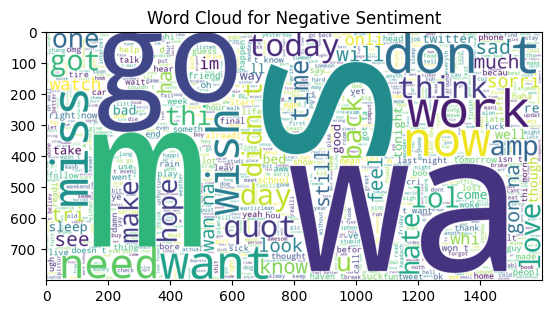

In [ ]:
negWC = wc.generate(df[df['sentiment']==0]['newTweet'].str.cat(sep=' '))
plt.imshow(negWC)
plt.title('Word Cloud for Negative Sentiment')
plt.plot()

In [ ]:
# most common 30 words in -ve tweets
negWords = nltk.FreqDist(w for t in df[df['sentiment']==0]['newTweet'] for w in t.split())
negWords.most_common(30)

[('i', 563626),
 ('to', 308863),
 ('the', 255629),
 ('my', 187341),
 ('it', 180851),
 ('a', 180702),
 ('and', 152997),
 ('is', 125889),
 ('t', 123962),
 ('in', 114639),
 ('you', 100956),
 ('for', 98036),
 ('of', 92070),
 ('s', 90922),
 ('have', 90721),
 ('me', 89400),
 ('so', 86168),
 ('that', 85097),
 ('but', 84455),
 ('on', 83490),
 ('go', 77873),
 ('m', 77050),
 ('not', 75257),
 ('be', 68176),
 ('just', 63510),
 ('at', 61711),
 ('get', 61017),
 ('wa', 58867),
 ('work', 56308),
 ('can', 53636)]

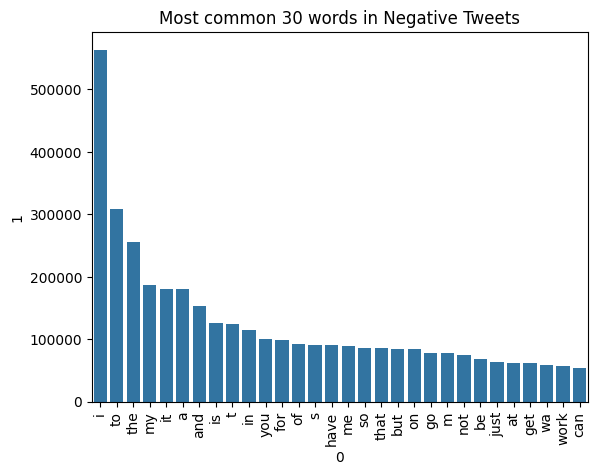

In [ ]:
sns.barplot(x=pd.DataFrame(negWords.most_common(30))[0], y=pd.DataFrame(negWords.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Most common 30 words in Negative Tweets")
plt.show()

For Positive Sentiment

[]

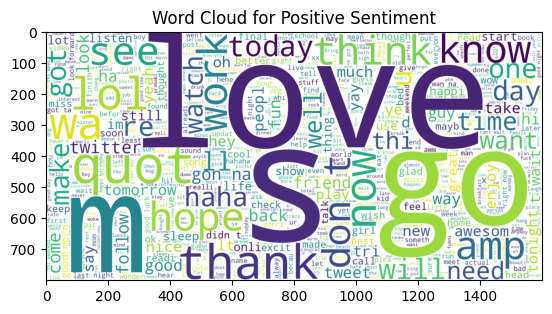

In [ ]:
posWC = wc.generate(df[df['sentiment']==1]['newTweet'].str.cat(sep=' '))
plt.imshow(posWC)
plt.title('Word Cloud for Positive Sentiment')
plt.plot()

In [ ]:
# most common 30 words in +ve tweets
posWords = nltk.FreqDist(w for t in df[df['sentiment']==1]['newTweet'] for w in t.split())
posWords.most_common(30)

[('i', 376169),
 ('the', 259456),
 ('to', 247785),
 ('a', 195387),
 ('you', 186684),
 ('it', 163936),
 ('and', 148171),
 ('my', 124256),
 ('for', 113810),
 ('is', 106714),
 ('in', 99856),
 ('s', 95450),
 ('of', 89936),
 ('that', 86412),
 ('on', 81307),
 ('me', 69946),
 ('have', 68444),
 ('with', 64395),
 ('so', 64395),
 ('just', 61767),
 ('be', 59783),
 ('good', 59602),
 ('m', 59583),
 ('love', 59307),
 ('go', 58208),
 ('t', 57159),
 ('day', 53221),
 ('at', 48673),
 ('but', 48033),
 ('get', 47131)]

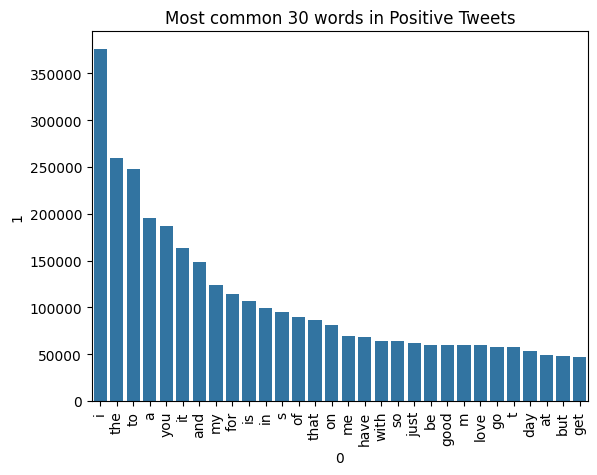

In [ ]:
sns.barplot(x=pd.DataFrame(posWords.most_common(30))[0], y=pd.DataFrame(posWords.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Most common 30 words in Positive Tweets")
plt.show()

## Model Training

In [ ]:
# separating feature & label
X = df['newTweet'].values
y = df['sentiment'].values

In [ ]:
# splitting data into train & test
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.15, random_state=7)

In [ ]:
# function for model evaluation
def modelEvaluation(model, test):
    # prediction for test data
    yPred = model.predict(test)

    # print evaluation metrics
    print(classification_report(yTest, yPred))

    # display confusion matrix
    cfMatrix = confusion_matrix(yTest, yPred)
    categories = ['Negative', 'Positive']
    groupNames = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    groupPercentages = ['{0:.2%}'.format(value) for value in cfMatrix.flatten() / np.sum(cfMatrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(groupNames, groupPercentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cfMatrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted Values', fontdict = {'size':14})
    plt.ylabel('Actual Values', fontdict = {'size':14})
    plt.title('Confusion Matrix', fontdict = {'size':18})
    plt.show()

#### CountVectorizer

In [ ]:
# transforming train & test data using CountVectorizer
cv = CountVectorizer(ngram_range=(1,2), max_features=500000)
start = time.time()
xTrainCV = cv.fit_transform(xTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
xTestCV = cv.transform(xTest)

Training time = 37.37 seconds



Training time = 0.70 seconds

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    115092
           1       0.78      0.81      0.79    112251

    accuracy                           0.79    227343
   macro avg       0.79      0.79      0.79    227343
weighted avg       0.79      0.79      0.79    227343



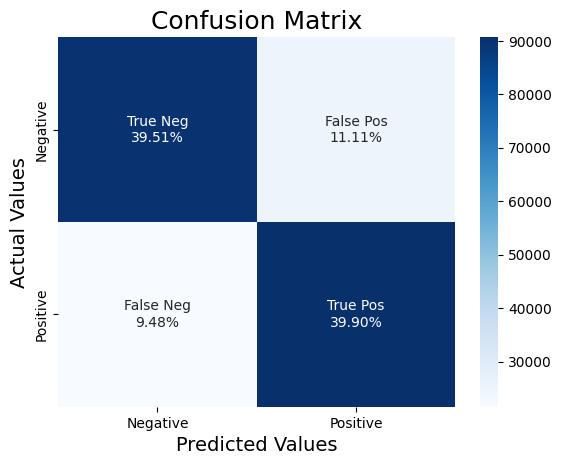

In [ ]:
# model-1: Bernoulli Naive Bayes with CountVectorizer
bnbCV = BernoulliNB()
start = time.time()
bnbCV.fit(xTrainCV, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(bnbCV, xTestCV)

Training time = 0.27 seconds

              precision    recall  f1-score   support

           0       0.79      0.80      0.80    115092
           1       0.80      0.79      0.79    112251

    accuracy                           0.80    227343
   macro avg       0.80      0.80      0.80    227343
weighted avg       0.80      0.80      0.80    227343



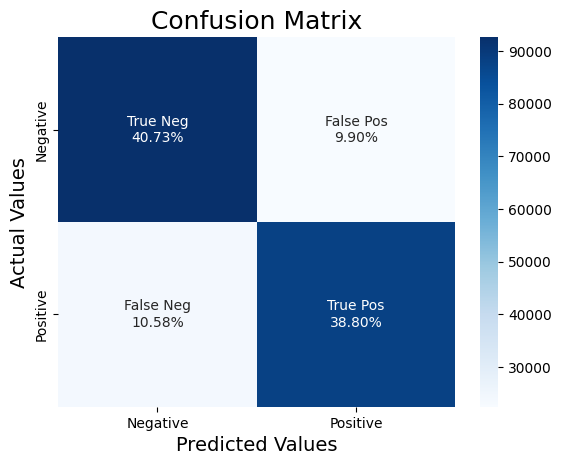

In [ ]:
# model-2: Multinomial Naive Bayes with CountVectorizer
mnbCV = MultinomialNB()
start = time.time()
mnbCV.fit(xTrainCV, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(mnbCV, xTestCV)

In [ ]:
# model-3: Logistic Regression with CountVectorizer
lrCV = LogisticRegression(C = 2, max_iter = 1000, n_jobs=1)
start = time.time()
lrCV.fit(xTrainCV, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(lrCV, xTestCV)

In [ ]:
# model-4: Linear SVC with CountVectorizer
svcCV = LinearSVC()
start = time.time()
svcCV.fit(xTrainCV, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(svcCV, xTestCV)

#### TfidfVectorizer

In [ ]:
# transforming train & test data using TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
start = time.time()
xTrainTF = tfidf.fit_transform(xTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
xTestTF = tfidf.transform(xTest)

In [ ]:
# model-5: Bernoulli Naive Bayes with TfidfVectorizer
bnbTF = BernoulliNB()
start = time.time()
bnbTF.fit(xTrainTF, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(bnbTF, xTestTF)

In [ ]:
# model-6: Multinomial Naive Bayes with TfidfVectorizer
mnbTF = MultinomialNB()
start = time.time()
mnbTF.fit(xTrainTF, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(mnbTF, xTestTF)

In [ ]:
# model-7: Logistic Regression with TfidfVectorizer
lrTF = LogisticRegression(C = 2, max_iter = 1000, n_jobs=1)
start = time.time()
lrTF.fit(xTrainTF, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(lrTF, xTestTF)

In [ ]:
# model-8: Linear SVC with TfidfVectorizer
svcTF = LinearSVC()
start = time.time()
svcTF.fit(xTrainTF, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(svcTF, xTestTF)

## Saving the model

| ID      | Text Extraction | ML Model           | Accuracy | f1-score (class 0) | f1-score (class 1) | Training Time |
|---------|-----------------|--------------------|----------|--------------------|--------------------|---------------|
| Model-1 | CountVectorizer | BernoulliNB        | 0.79     | 0.79               | 0.79               | 0.93 sec      |
| Model-2 | CountVectorizer | MultinomialNB      | 0.8      | 0.8                | 0.79               | 0.87 sec      |
| Model-3 | CountVectorizer | LogisticRegression | 0.8      | 0.8                | 0.81               | 531.09 sec    |
| Model-4 | CountVectorizer | LinearSVC          | 0.78     | 0.78               | 0.78               | 680.62 sec    |
| Model-5 | TfidfVectorizer | BernoulliNB        | 0.79     | 0.79               | 0.79               | 1.07 sec      |
| Model-6 | TfidfVectorizer | MultinomialNB      | 0.8      | 0.8                | 0.79               | 0.71 sec      |
| Model-7 | TfidfVectorizer | LogisticRegression | 0.82     | 0.82               | 0.82               | 22.81sec    |
| Model-8 | TfidfVectorizer | LinearSVC          | 0.81     | 0.81               | 0.81               | 52.5 sec      |


Saving **model-7:** *Logistic Regression with TfidfVectorizer*

In [ ]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(lrTF, open('model.pkl', 'wb'))